<div style="float: right; color: gray; ">&copy; Guven</div>

_This notebook is provided in ipynb format to enable the perceptron widget._  
_Instructions: After downloading the file in the Anaconda environment, run the cells._
***

## Perceptron Visualization 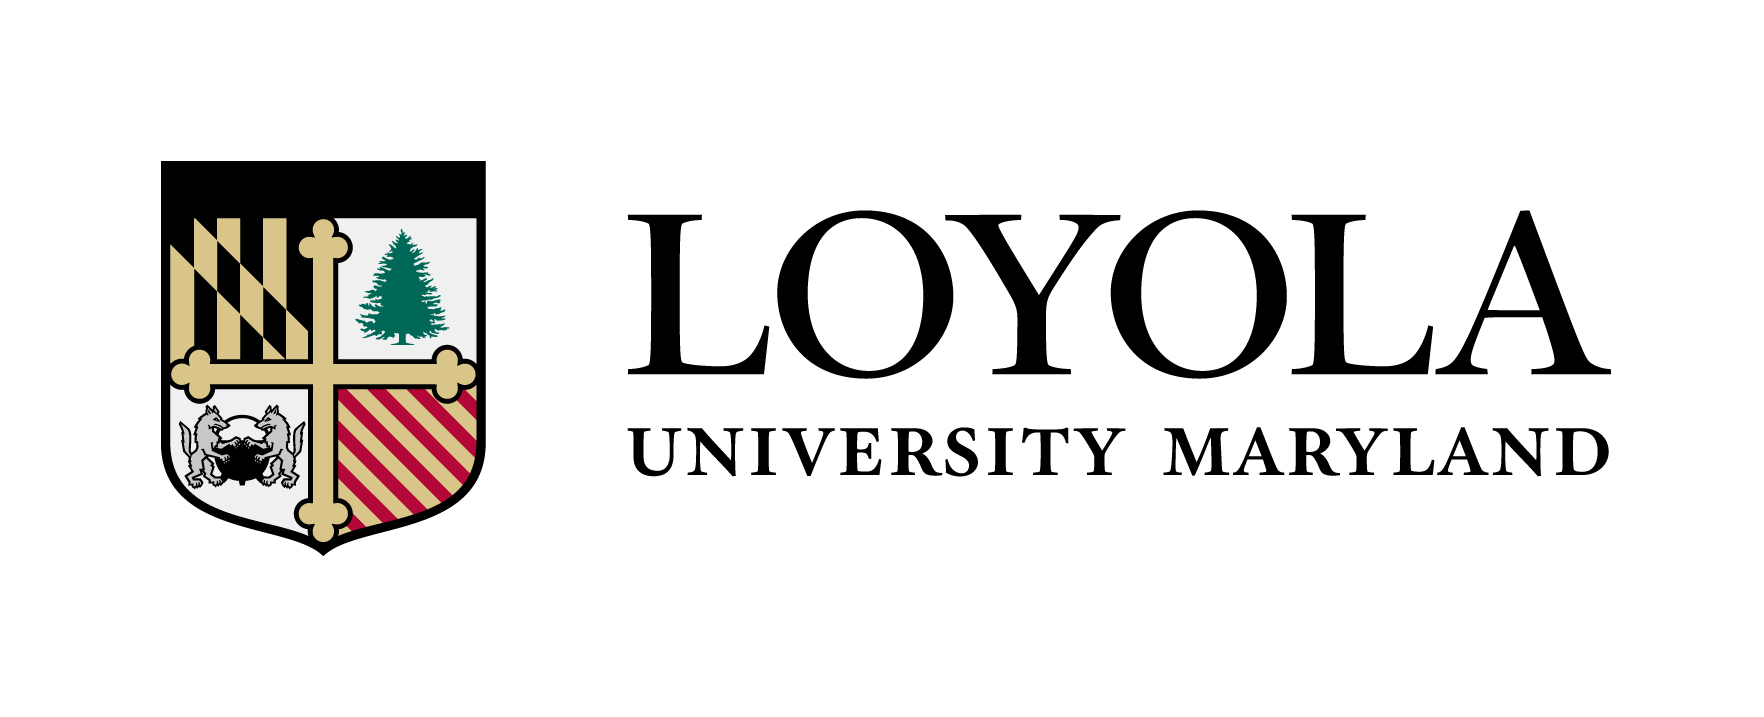

The perceptron is a binary classifier that _attempts_ to find an $M$ dimensional hyperplane $w$ which separates the data points $X$ into two categories $\{0,1\}$, given by the ground truth $y$.

$\mathbf{f}(x)=
\begin{cases}
    1, & \text{if }w \cdot x + b > 0 \\
    0, & \text{otherwise}
\end{cases}$

In the visualization below, $M$ is $2$ as in the $x_1$ and $x_2$ axes, shown as the x and y dimensions in the plot.

In this example, in order to show properly, the perceptron equation $w \cdot x + b$, or $w^\top x + b$ defines the hyperplane in $2$ dimensions. The hyperplane is all the points $x=(x_1,x_2)$ that make the hyperplane equation zero, i.e. $w^\top x+b=0$

In the visualization below, the parameter $\text{theta}$ (in radians) controls the angle of the hyperplane so that the $w_1$ and $w_2$ is computed from the given $\text{theta}$, $b$ is the hyperplane offset and all the points $x$ that make $w^\top x + b > 0$ are shown with the marker $\text{+}$ and all the points $x$ that make $w^\top x + b \leq 0$ are shown with the marker $\text{o}$.

Also shown the __normal__ of the hyperplane as red arrows.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from numpy import array, sin, cos, dot, pi, arange, linspace, meshgrid
from ipywidgets.widgets import interactive, interact, interactive_output, HBox, VBox, FloatSlider, Label, Text, jslink

# Hyperplane xw+b=0
def hyper(x1, w, b):
    # x1, x2 are scalar/vector, w is vector, b is scalar
    # Find and return x2 from x1 that is on the hyperplane, i.e. solve the equation wx+b=0
    return -(x1*w[0]+b)/w[1] if w[1] != 0 else 0

# Classifier
def perceptron(x, w, b):
    # x, w are vectors, b is scalar
    # Return the classification, i.e. f(x)
    return 1 if dot(x,w)+b > 0 else 0

In [2]:
# h controls the display granularity
h = 1.7

# Display x1 and x2 limits
x1_min, x1_max = -10, 10
x2_min, x2_max = -10, 10

# Widgets in decorator
@interact(theta=FloatSlider(value=pi/8, min=-pi/1.7, max=pi/1.7), b=(-7.,7.))
def plot_w(theta, b):
    plt.figure(figsize=(6, 6))
    # theta controls the angle of the hyperplane
    w = array([cos(theta), sin(theta)])
    # Plot normal arrows
    x1 = linspace(2*sin(theta)*x1_min, 2*sin(theta)*x1_max, 11)
    x2 = hyper(x1, w, b)
    x1_end = x1 + h*w[0]
    x2_end = x2 + h*w[1];
    for x1_o,x2_o,x1_e,x2_e in zip(x1,x2,x1_end,x2_end):
        plt.arrow(x1_o, x2_o, x1_e-x1_o, x2_e-x2_o, head_width=.3, color='r')
    # Plot the hyperplane
    x1 = arange(x1_min-h,x1_max+h,h)
    x2 = hyper(x1, w, b)
    plt.plot(x1, x2)
    plt.xlim(x1_min, x1_max); plt.ylim(x2_min, x2_max); plt.grid()
    # Show x1 and x2 points according to their classification by the perceptron, i.e. w and b
    x1 = arange(x1_min-h,x1_max+h,h)
    x2 = arange(x2_min-h,x2_max+h,h)
    x1v, x2v = meshgrid(x1, x2, sparse=False, indexing='xy')
    p1 = [(x,y) for (x,y) in zip(x1v.flatten(), x2v.flatten()) if perceptron(array([x,y]), w, b) <= 0]
    plt.scatter(*zip(*p1), marker='o', label='class 0')
    p2 = [(x,y) for (x,y) in zip(x1v.flatten(), x2v.flatten()) if perceptron(array([x,y]), w, b) > 0]
    plt.scatter(*zip(*p2), marker='+', label='class 1')
    plt.xlabel(r'$x_1$', horizontalalignment='right', x=1.0)
    plt.ylabel(r'$x_2$', horizontalalignment='right', y=1.0)
    plt.legend()
    # Hyperplane w
    plt.title(f'$\\theta$={theta:.2f} $w_1$={cos(theta):.2f} $w_2$={sin(theta):.2f}')
    plt.show()


interactive(children=(FloatSlider(value=0.39269908169872414, description='theta', max=1.8479956785822313, min=…

Study the above widget with different $\theta$ and $b$ values. In supervised learning, this perceptron classifier is _trained_ with the labels in $y$, to determine $w_1$, $w_2$ and $b$ by minimizing the classification error. An example training program is provided in the Textbook (Raschka, 2019) Chapter 2, section Training a perceptron model on the Iris
dataset.
***